In [16]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
%matplotlib inline

#### Check out the data

In [17]:
# merging two csv files 
# student_data = pd.read_csv('combined_file.csv')
#student_data = pd.concat(map(pd.read_csv, ['student-mat.csv', 'student-por.csv']), ignore_index=True)

# Read the CSV files
df1 = pd.read_csv('student-mat.csv')
df2 = pd.read_csv('student-por.csv')

# Merge the two dataframes
student_data = pd.concat([df1, df2])

student_data.to_csv("combined.csv", index=False)

##### Understand the data

In [18]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [19]:
student_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [20]:
student_data.drop(columns=student_data.columns[0], axis=1,  inplace=True)

In [21]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   address     1044 non-null   object
 3   famsize     1044 non-null   object
 4   Pstatus     1044 non-null   object
 5   Medu        1044 non-null   int64 
 6   Fedu        1044 non-null   int64 
 7   Mjob        1044 non-null   object
 8   Fjob        1044 non-null   object
 9   reason      1044 non-null   object
 10  guardian    1044 non-null   object
 11  traveltime  1044 non-null   int64 
 12  studytime   1044 non-null   int64 
 13  failures    1044 non-null   int64 
 14  schoolsup   1044 non-null   object
 15  famsup      1044 non-null   object
 16  paid        1044 non-null   object
 17  activities  1044 non-null   object
 18  nursery     1044 non-null   object
 19  higher      1044 non-null   object
 20  internet    10

In [22]:
student_data.drop_duplicates()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,6,5,6,6
1,F,17,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,4,5,5,6
2,F,15,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,10,7,8,10
3,F,15,U,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,2,15,14,15
4,F,16,U,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,F,19,R,GT3,T,2,3,services,other,course,...,5,4,2,1,2,5,4,10,11,10
645,F,18,U,LE3,T,3,1,teacher,services,course,...,4,3,4,1,1,1,4,15,15,16
646,F,18,U,GT3,T,1,1,other,other,course,...,1,1,1,1,1,5,6,11,12,9
647,M,17,U,LE3,T,3,1,services,services,course,...,2,4,5,3,4,2,6,10,10,10


In [23]:

student_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   address     1044 non-null   object
 3   famsize     1044 non-null   object
 4   Pstatus     1044 non-null   object
 5   Medu        1044 non-null   int64 
 6   Fedu        1044 non-null   int64 
 7   Mjob        1044 non-null   object
 8   Fjob        1044 non-null   object
 9   reason      1044 non-null   object
 10  guardian    1044 non-null   object
 11  traveltime  1044 non-null   int64 
 12  studytime   1044 non-null   int64 
 13  failures    1044 non-null   int64 
 14  schoolsup   1044 non-null   object
 15  famsup      1044 non-null   object
 16  paid        1044 non-null   object
 17  activities  1044 non-null   object
 18  nursery     1044 non-null   object
 19  higher      1044 non-null   object
 20  internet    10

In [24]:
#sns.catplot(x="sex", y="studytime", data=student_data, kind="box", aspect=1.5)
#sns.catplot(x="paid", y="G1", data=student_data, kind="box", aspect=1.5)
#plt.show()

In [25]:
df_corr = student_data
column_mapping = {
        'sex': {'F': 0, 'M': 1},
    'famsize': {'LE3': 0, 'GT3': 1},
    'Pstatus': {'A': 0, 'T': 1},
    'schoolsup': {'no': 0, 'yes': 1},
    'famsup': {'no': 0, 'yes': 1},
    'paid': {'no': 0, 'yes': 1},
    'activities': {'no': 0, 'yes': 1},
    'nursery': {'no': 0, 'yes': 1},
    'higher': {'no': 0, 'yes': 1},
    'internet': {'no': 0, 'yes': 1},
    'romantic': {'no': 0, 'yes': 1}
}
for column, mapping in column_mapping.items():
    df_corr[column] = df_corr[column].map(mapping)
# Drop columns
df_corr.drop(['address', 'Mjob', 'Fjob', 'reason', 'guardian'], axis=1, inplace=True)


In [26]:
df_corr

,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,1,0,4,4,2,2,0,1,...,4,3,4,1,1,3,6,5,6,6
1,0,17,1,1,1,1,1,2,0,0,...,5,3,3,1,1,3,4,5,5,6
2,0,15,0,1,1,1,1,2,3,1,...,4,3,2,2,3,3,10,7,8,10
3,0,15,1,1,4,2,1,3,0,0,...,3,2,2,1,1,5,2,15,14,15
4,0,16,1,1,3,3,1,2,0,0,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,19,1,1,2,3,1,3,1,0,...,5,4,2,1,2,5,4,10,11,10
645,0,18,0,1,3,1,1,2,0,0,...,4,3,4,1,1,1,4,15,15,16
646,0,18,1,1,1,1,2,2,0,0,...,1,1,1,1,1,5,6,11,12,9
647,1,17,0,1,3,1,2,1,0,0,...,2,4,5,3,4,2,6,10,10,10


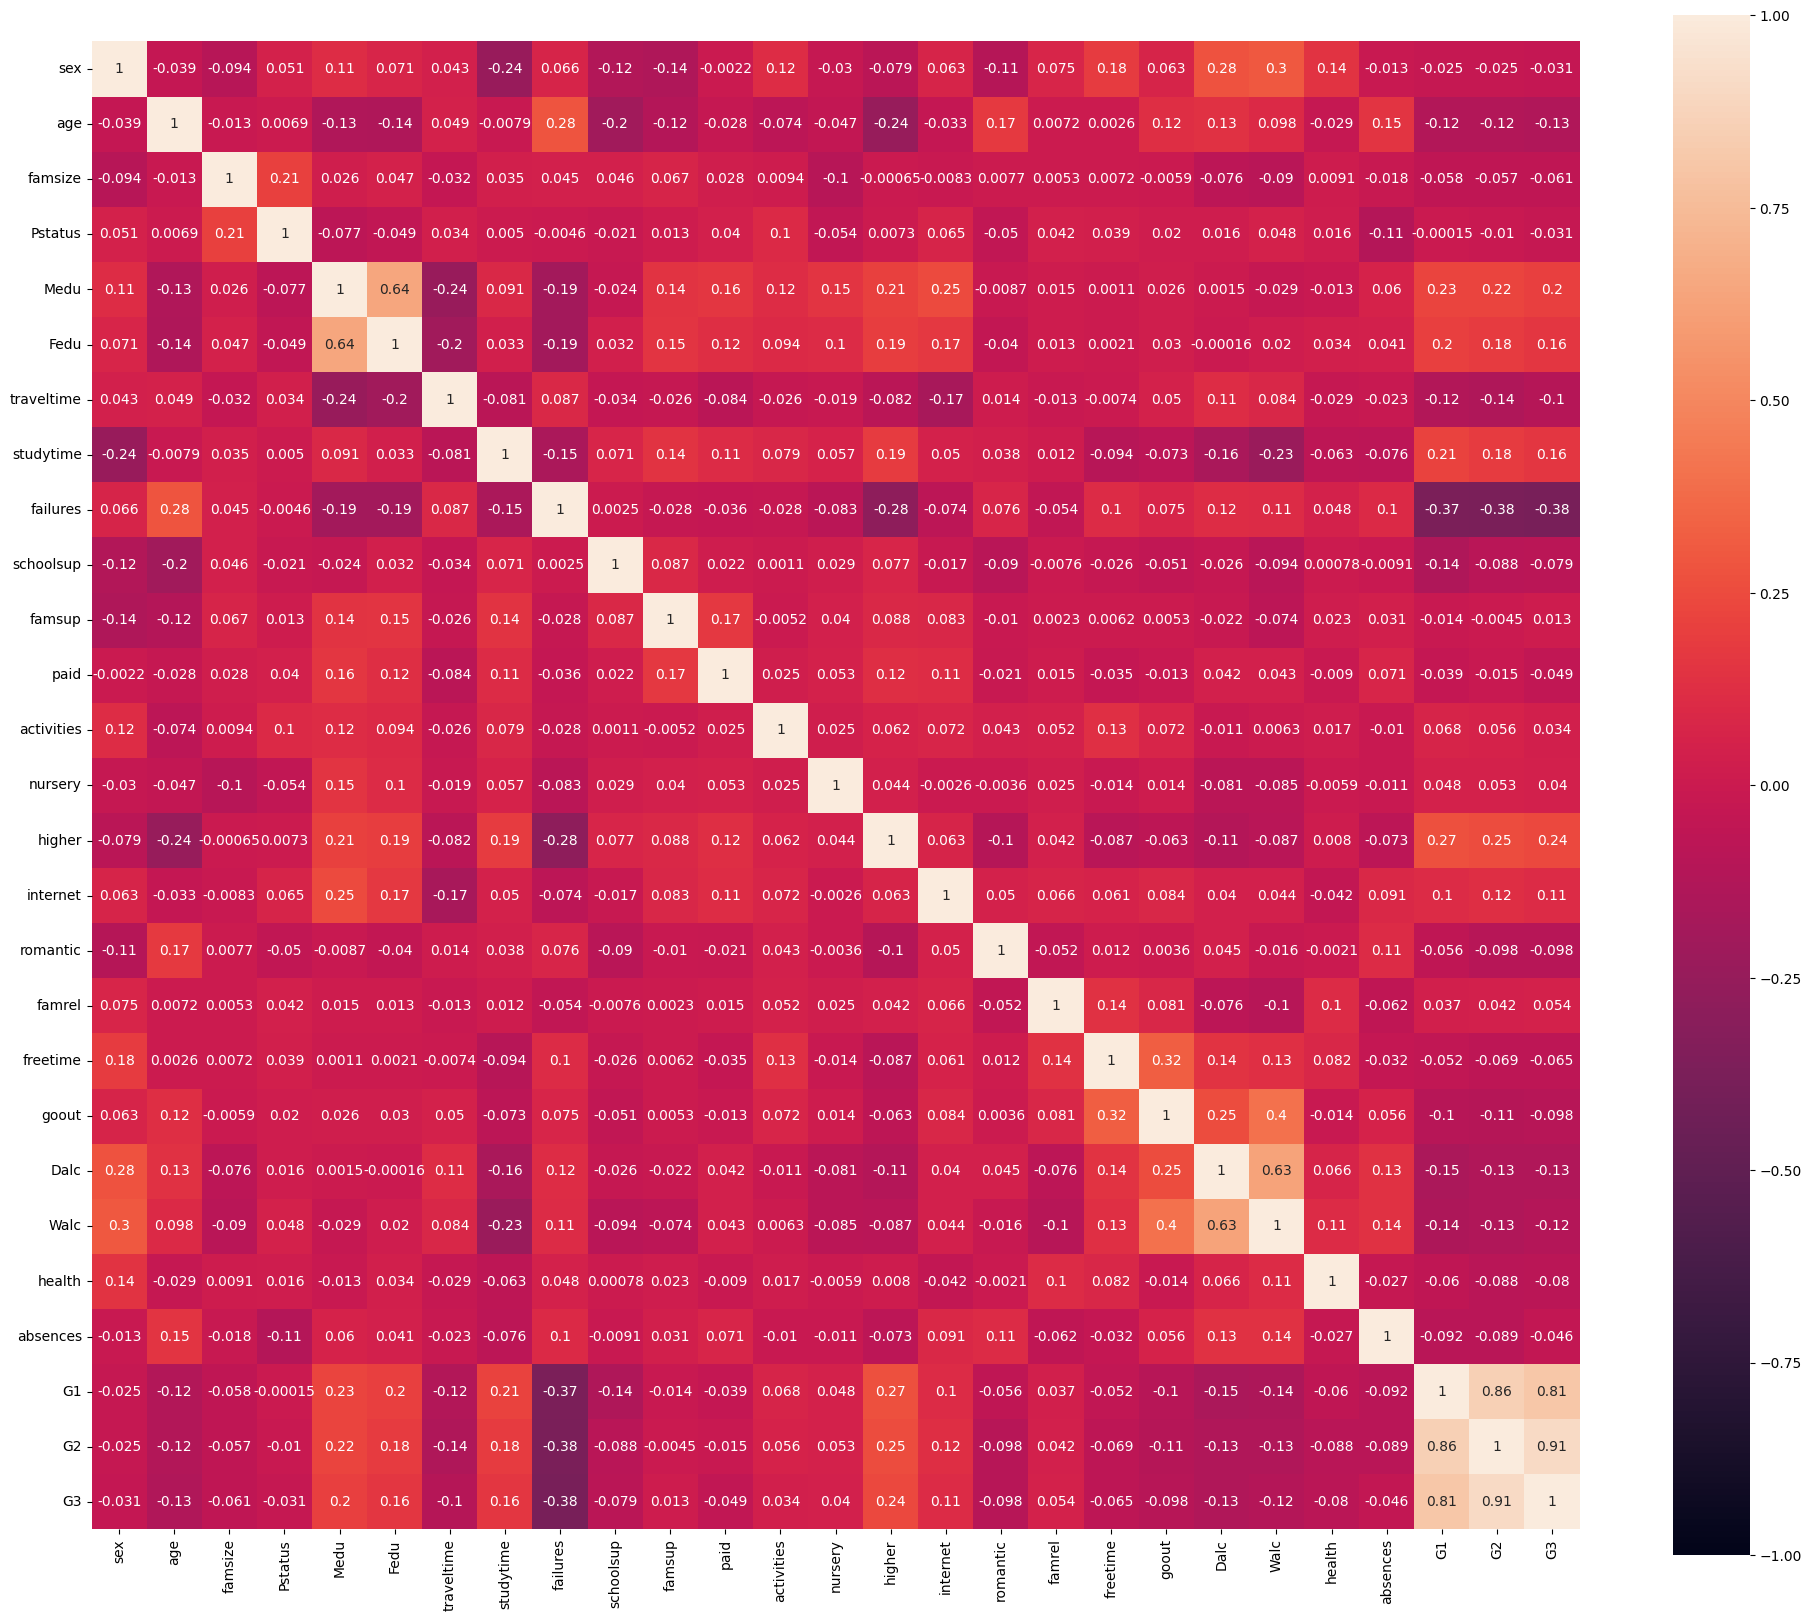

In [27]:
corr_matrix = df_corr.corr(numeric_only=True)
f,ax = plt.subplots(figsize=(24,20))
sns.heatmap(corr_matrix,vmin=-1,vmax=1, square = True, annot = True);

In [30]:
top_corr = corr_matrix.unstack()
top_corr = top_corr[top_corr != 1]  # Filter out correlations with a value of '1'
top_10_corr = top_corr.nlargest(20)  # Get the top 10 correlations

# The result will be a Pandas Series with the top 10 correlations (excluding '1')
print(top_10_corr['failures'])

age    0.282364
dtype: float64


In [32]:
top_down_corr = corr_matrix.unstack()
top_down_10_corr = top_corr.nsmallest(20)  # Get the top 10 correlations

# The result will be a Pandas Series with the top 10 correlations (excluding '1')
print(top_down_10_corr['failures'])

G3       -0.383145
G2       -0.377172
G1       -0.374175
higher   -0.284893
dtype: float64


In [139]:
X = df_corr[['age', 'famsup','goout' , 'Dalc', 'Walc', 'Medu']]
y = df_corr['failures']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train


,age,famsup,goout,Dalc,Walc,Medu
258,17,0,2,1,1,3
33,15,0,2,1,1,3
13,15,1,3,1,2,4
81,15,0,2,1,2,2
143,16,0,4,3,3,1
...,...,...,...,...,...,...
176,15,0,4,2,4,1
171,16,0,2,1,2,2
141,16,1,3,1,1,1
386,17,1,3,1,1,2


In [141]:
''' decision tree '''
clf = DecisionTreeClassifier(random_state=2021)

In [142]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2021)

In [143]:
y_pred = clf.predict(X_test)
y_test

208    0
465    1
247    0
194    0
234    0
      ..
149    0
228    0
474    0
612    1
27     0
Name: failures, Length: 261, dtype: int64

#### Confusion Matrix

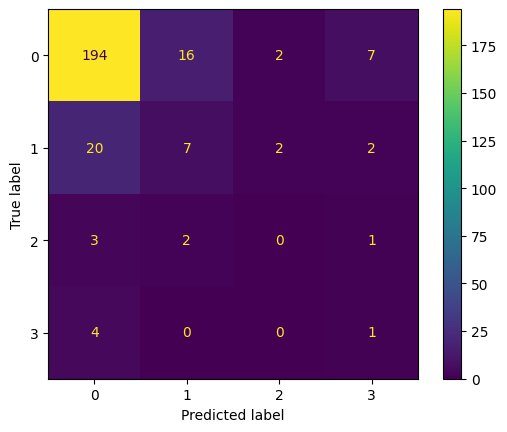

In [144]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred )
plt.show()

In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       219
           1       0.28      0.23      0.25        31
           2       0.00      0.00      0.00         6
           3       0.09      0.20      0.13         5

    accuracy                           0.77       261
   macro avg       0.31      0.33      0.31       261
weighted avg       0.77      0.77      0.77       261



In [146]:
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy:.2f}')

accuracy: 0.77


#### GridSearchCV

In [147]:
from sklearn.model_selection import GridSearchCV

In [148]:
print(clf.get_depth())
print(clf.get_n_leaves())

16
204


In [149]:
param_grid_dt = {'criterion' : ['gini', 'entropy'], 'max_depth': [1,2,3,4,5,6,7]}
estimator_dt = DecisionTreeClassifier(random_state=2022)
grid_dt = GridSearchCV(estimator_dt, param_grid_dt, refit = True, verbose=2)

In [150]:
grid_dt.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini,

GridSearchCV(estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7]},
             verbose=2)

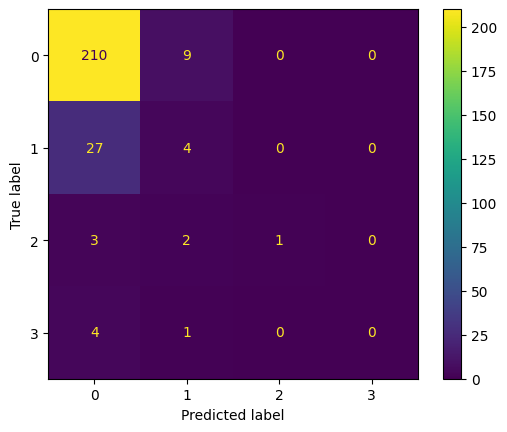

In [151]:
ConfusionMatrixDisplay.from_predictions(y_test, grid_dt.predict(X_test))
plt.show()

In [152]:
print(classification_report(y_test, grid_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       219
           1       0.25      0.13      0.17        31
           2       1.00      0.17      0.29         6
           3       0.00      0.00      0.00         5

    accuracy                           0.82       261
   macro avg       0.53      0.31      0.34       261
weighted avg       0.77      0.82      0.79       261



/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

Com a abordagem GridSearchCV a nossa accuracy melhorou para 0.82

#### Decision Tree Pruning

In [153]:
print(clf.get_depth())
print(clf.get_n_leaves())

16
204


In [154]:
max_depth = clf.get_depth()

In [155]:
param_grid = {'max_depth' : [max_depth for max_depth in range(1,max_depth+1)]}
estimator = DecisionTreeClassifier(random_state=42)
max_depth_grid_search = GridSearchCV(estimator,param_grid)

max_depth_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16]})

In [156]:
max_depth_grid_search.best_params_

{'max_depth': 3}

In [157]:
max_depth_tree = max_depth_grid_search.best_estimator_
print(max_depth_tree)

DecisionTreeClassifier(max_depth=3, random_state=42)


In [158]:
best_max_depth = max_depth_tree.get_depth()
print(best_max_depth)

3


In [159]:
print(classification_report(y_test, max_depth_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       219
           1       0.40      0.13      0.20        31
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5

    accuracy                           0.84       261
   macro avg       0.32      0.28      0.28       261
weighted avg       0.77      0.84      0.80       261



/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

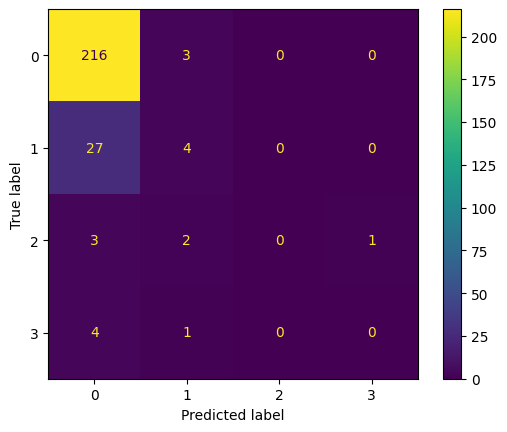

In [160]:
ConfusionMatrixDisplay.from_predictions(y_test, max_depth_grid_search.predict(X_test))
plt.show()